# These are the Cartography visuals.

# Imports Section 

In [1]:
import sys
sys.path.append("../notebooks/scripts/")

In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [3]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [5]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [6]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [8]:
try:
    colors = snakemake.input.colors
    node_df = snakemake.input.node_df

    pca_df = snakemake.input.pca_df
    explained_variance_pca = snakemake.input.explained_variance_pca

    mds_df = snakemake.input.mds_df
    tsne_df = snakemake.input.tsne_df
    umap_df = snakemake.input.umap_df

    #Scatterplot:
    scatterplot_pca = snakemake.input.scatterplot_pca
    scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

    scatterplot_mds = snakemake.input.scatterplot_mds
    scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

    scatterplot_tsne = snakemake.input.scatterplot_tsne
    scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

    scatterplot_umap = snakemake.input.scatterplot_umap
    scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata = snakemake.input.KDE_pca_metadata

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata = snakemake.input.KDE_mds_metadata

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata = snakemake.input.KDE_tsne_metadata

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata = snakemake.input.KDE_umap_metadata
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata = snakemake.input.KDE_genetic_metadata
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [15]:
range_ = ['#6626d4', '#4138c3', '#5499ff', '#5499ff', '#87dfb3', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36','#dc2f24']

In [16]:
len(range_)

13

# Reading in all the data from the scripts

In [4]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/sars-cov-2-nextstrain'

In [5]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df

,strain,num_date,pca1,pca2,pca3,pca4,mds1,mds2,tsne_x,tsne_y,umap_x,umap_y,clade_membership,pca_label,mds_label,umap_label,t-sne_label,y_value
0,Wuhan/WH01/2019,2019.98,-5.64,-3.43,-1.03,-0.79,-0.93,-7.15,-14.36,-21.50,-6.45,9.88,19A,3,6,1,1,1
1,CHN/HZ-79/2020,2020.06,-4.55,-0.06,-1.52,0.36,-0.15,-5.97,-13.40,-21.02,-5.72,8.73,19A,4,6,1,1,2
2,TWN/CGMH-CGU-01/2020,2020.07,-5.63,-3.43,-1.03,-0.77,-0.15,-5.97,-13.41,-21.02,-5.92,8.75,19A,3,6,1,1,3
3,USA/MA-CDC-MA1/2020,2020.08,-5.63,-3.42,-1.01,-0.75,-1.15,-9.42,-12.49,-19.27,-6.04,11.05,19A,3,-1,1,1,4
4,THA/SI200615-NT/2020,2020.08,-0.34,20.14,-1.78,0.10,-2.13,-8.78,-11.97,-20.55,-6.10,11.19,19A,0,-1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,AUT/2021014034/2021,2021.18,-3.55,-0.84,-1.70,0.04,-6.97,35.53,-46.27,0.69,17.00,3.33,20I/501Y.V1,1,0,0,0,794
794,AUT/2021019405/2021,2021.22,-0.35,-2.91,30.94,26.47,-16.53,27.09,-46.13,0.73,15.50,2.13,20I/501Y.V1,-1,0,0,0,795
795,AUT/2021014568/2021,2021.26,-3.55,-0.84,-1.70,0.04,-7.06,36.71,-46.23,0.57,16.53,3.25,20I/501Y.V1,1,0,0,0,796
796,AUT/2021019349/2021,2021.22,-3.55,-0.84,-1.70,0.04,-7.10,36.70,-46.49,0.72,16.70,3.30,20I/501Y.V1,1,0,0,0,797


In [6]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)
domain = list(set(node_df["clade_membership"]))

In [7]:
node_df.head()

,strain,date,pca1,pca2,pca3,pca4,mds1,mds2,tsne_x,tsne_y,umap_x,umap_y,clade_membership,pca_label,mds_label,umap_label,t-sne_label,y
0,Wuhan/WH01/2019,2019.98,-5.64,-3.43,-1.03,-0.79,-0.93,-7.15,-14.36,-21.50,-6.45,9.88,19A,3,6,1,1,1
1,CHN/HZ-79/2020,2020.06,-4.55,-0.06,-1.52,0.36,-0.15,-5.97,-13.40,-21.02,-5.72,8.73,19A,4,6,1,1,2
2,TWN/CGMH-CGU-01/2020,2020.07,-5.63,-3.43,-1.03,-0.77,-0.15,-5.97,-13.41,-21.02,-5.92,8.75,19A,3,6,1,1,3
3,USA/MA-CDC-MA1/2020,2020.08,-5.63,-3.42,-1.01,-0.75,-1.15,-9.42,-12.49,-19.27,-6.04,11.05,19A,3,-1,1,1,4
4,THA/SI200615-NT/2020,2020.08,-0.34,20.14,-1.78,0.10,-2.13,-8.78,-11.97,-20.55,-6.10,11.19,19A,0,-1,1,1,5


# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [8]:
#principalDf = pd.read_csv(pca_df, index_col=0)
principalDf = pd.read_csv("results/embed_pca.csv", index_col=0)

In [9]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df = pd.read_csv("results/explained_variance_pca.csv")
explained_variance_df

,explained variance,principal components
0,0.3324,1
1,0.0464,2
2,0.0267,3
3,0.0211,4
4,0.0195,5
5,0.0176,6
6,0.0167,7
7,0.0151,8
8,0.0136,9
9,0.0125,10


NameError: name 'snakemake' is not defined

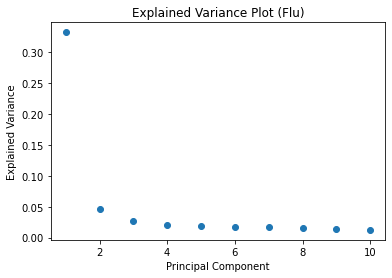

In [10]:
plt.plot(explained_variance_df['principal components'].values.tolist(), explained_variance_df["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu)")

plt.savefig(snakemake.output.Explained_variance_PCA)

In [11]:
merged_pca_df = principalDf.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [12]:
merged_pca_df.head()

,strain,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,date,y,clade_membership
0,Wuhan/WH01/2019,-1.853891,0.356047,-1.130627,-0.570762,0.197020,0.217923,-0.787763,-0.535532,-0.675310,-0.373460,2019.98,1,19A
1,USA/WA-CDC-WA1-A12/2020,-1.862972,0.369419,-1.226440,-0.629192,0.234683,0.259988,-0.931115,-0.637361,-0.871159,-0.483456,2020.07,43,19B
2,CHN/HZ-79/2020,-1.849719,0.351980,-1.109775,-0.557250,0.192077,0.218147,-0.763885,-0.517580,-0.650991,-0.358717,2020.06,2,19A
3,TWN/CGMH-CGU-01/2020,-1.849719,0.351980,-1.109775,-0.557250,0.192077,0.218147,-0.763885,-0.517580,-0.650991,-0.358717,2020.07,3,19A
4,AUS/VIC03/2020,-1.858183,0.363235,-1.177188,-0.602822,0.208379,0.239727,-0.843867,-0.577061,-0.735874,-0.424105,2020.07,14,19A


In [13]:
explained_variance_PCA = explained_variance_df["explained variance"].values.tolist()

In [17]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

# HDBSCAN Output

In [23]:
list_of_chart = linking_tree_with_plots_clickable(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "pca_label:N",["pca_label"], ['strain']) #domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[4]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

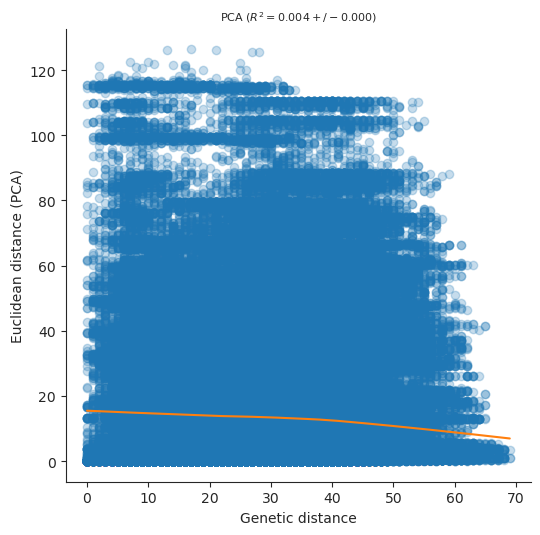

In [25]:
#total_df_PCA = pd.read_csv(scatterplot_pca,index_col=0)
#metadata_PCA = pd.read_csv(scatterplot_pca_metadata, index_col=0)

total_df_PCA = pd.read_csv("results/scatterplot_pca.csv",index_col=0)
metadata_PCA = pd.read_csv("results/scatterplot_pca_metadata.csv", index_col=0)

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (PCA)")
ax.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

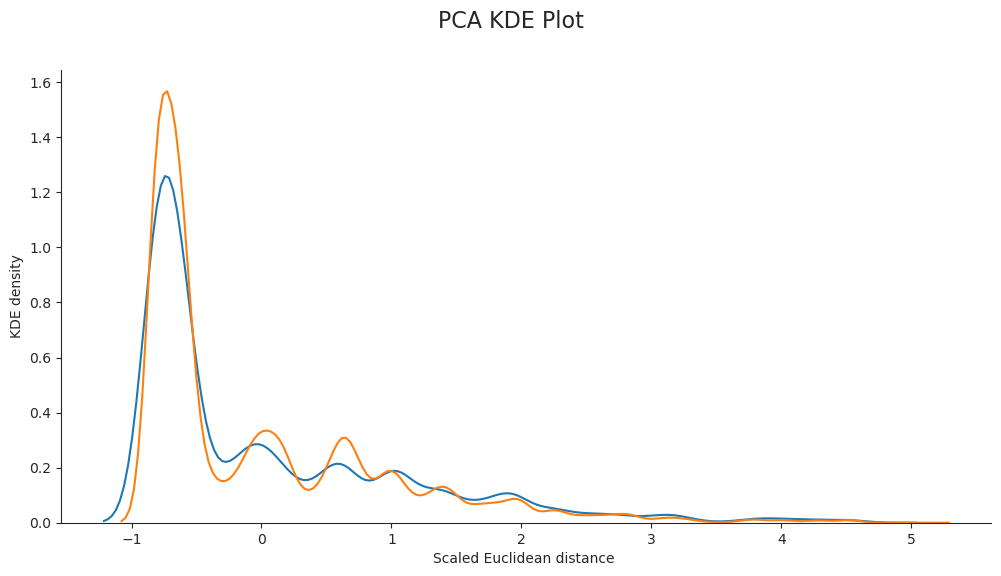

In [26]:
KDE_pca = "results/KDEDensity_pca.csv"
KDE_pca_metadata = "results/KDEDensity_pca_metadata.csv"

PCA_KDE_df = pd.read_csv(KDE_pca)
PCA_KDE_metadata_df = pd.read_csv(KDE_pca_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('PCA KDE Plot', fontsize=16)
sns.despine()

# Running MDS on the Dataset

In [29]:
#MDS_df = pd.read_csv(mds_df, index_col=0)
MDS_df = pd.read_csv("results/embed_mds.csv")

In [31]:
merged_mds_df = MDS_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [32]:
merged_mds_df

,strain,mds1,mds2,mds_label,date,y,clade_membership
0,Wuhan/WH01/2019,-0.927265,-7.145352,6,2019.98,1,19A
1,USA/WA-CDC-WA1-A12/2020,-1.475252,-8.300023,6,2020.07,43,19B
2,CHN/HZ-79/2020,-0.153647,-5.970496,6,2020.06,2,19A
3,TWN/CGMH-CGU-01/2020,-0.153647,-5.970496,6,2020.07,3,19A
4,AUS/VIC03/2020,-0.626060,-5.913096,6,2020.07,14,19A
...,...,...,...,...,...,...,...
793,AUT/2021013675/2021,-6.836054,29.274068,0,2021.26,780,20I/501Y.V1
794,USA/MN-MDH-5087/2021,-4.001518,29.018656,0,2021.26,762,20I/501Y.V1
795,USA/IN-CDC-FG-018226/2021,-11.102886,30.335318,0,2021.26,672,20I/501Y.V1
796,AUT/2021014482/2021,-6.924442,36.727237,0,2021.26,798,20I/501Y.V1


In [34]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership:N', domain, range_)
chart_12_mds

alt.Chart(...)

In [35]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
list_of_chart[0]|list_of_chart[1]

alt.HConcatChart(...)

# HDBSCAN output:

In [36]:
list_of_chart = linking_tree_with_plots_clickable(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'mds_label:N', ["mds_label"], ['strain','clade_membership'])
list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

alt.HConcatChart(...)

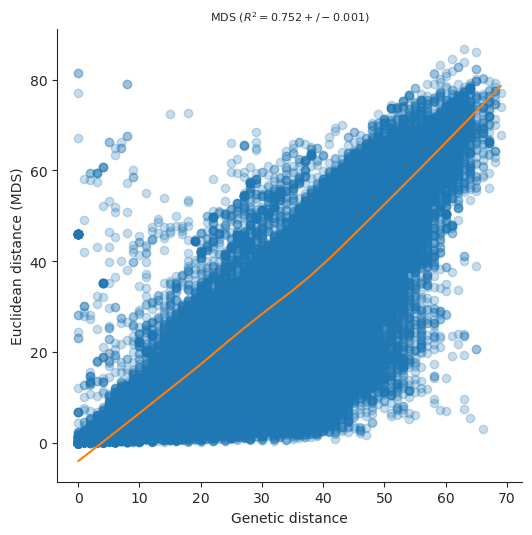

In [38]:
#total_df_MDS = pd.read_csv(scatterplot_mds,index_col=0)
#metadata_MDS = pd.read_csv(scatterplot_mds_metadata, index_col=0)

total_df_MDS = pd.read_csv("results/scatterplot_mds.csv",index_col=0)
metadata_MDS = pd.read_csv("results/scatterplot_mds_metadata.csv", index_col=0)

mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (MDS)")
ax.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

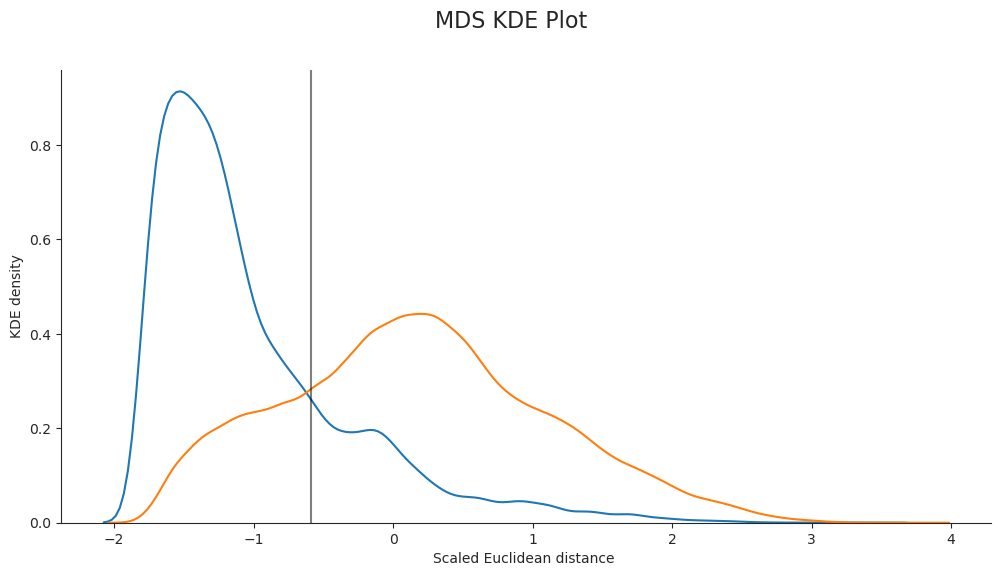

In [40]:
#KDE_mds = "results/KDEDensity_mds.csv"
#KDE_mds_metadata = "results/KDEDensity_mds_metadata.csv"

MDS_KDE_df = pd.read_csv(KDE_mds)
MDS_KDE_metadata_df = pd.read_csv(KDE_mds_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('MDS KDE Plot', fontsize=16)
sns.despine()

# Running T-SNE on the Dataset 

In [41]:
TSNE_df = node_df[["strain", "date", "y", "clade_membership", "tsne_x", "tsne_y", "t-sne_label"]]

In [42]:
scatterplot_with_tooltip_interactive(TSNE_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [43]:
list_of_chart = linking_tree_with_plots_brush(
    TSNE_df,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

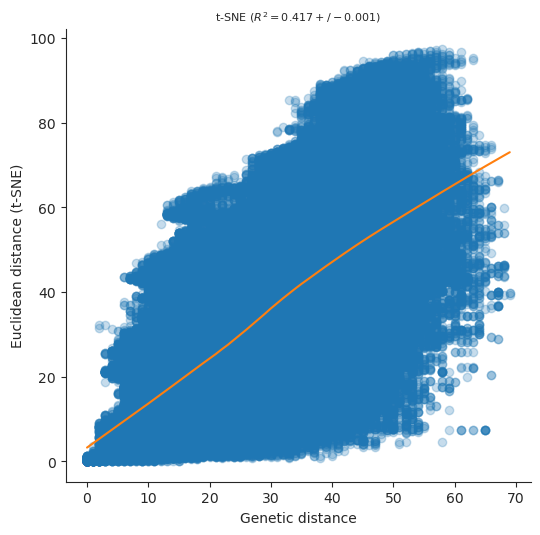

In [45]:
#total_df_TSNE = pd.read_csv(scatterplot_tsne,index_col=0)
#metadata_TSNE = pd.read_csv(scatterplot_tsne_metadata, index_col=0)

total_df_TSNE = pd.read_csv("results/scatterplot_t-sne.csv",index_col=0)
metadata_TSNE = pd.read_csv("results/scatterplot_t-sne_metadata.csv", index_col=0)

mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (t-SNE)")
ax.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

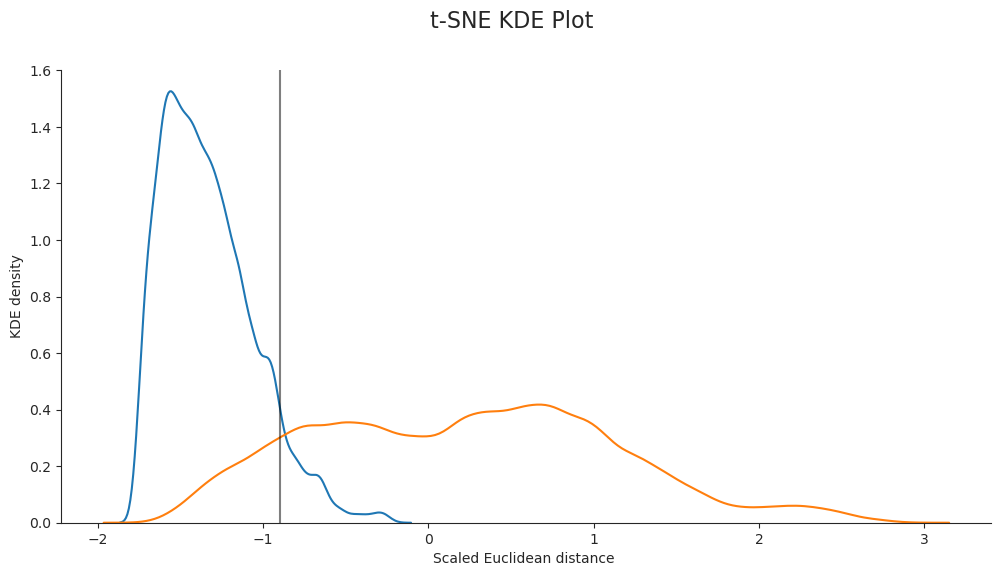

In [46]:
KDE_tsne = "results/KDEDensity_t-sne.csv"
KDE_tsne_metadata = "results/KDEDensity_t-sne_metadata.csv"

TSNE_KDE_df = pd.read_csv(KDE_tsne)
TSNE_KDE_metadata_df = pd.read_csv(KDE_tsne_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('t-SNE KDE Plot', fontsize=16)
sns.despine()

# Running UMAP on the Dataset

In [47]:
UMAP_df = node_df[["strain", "date", "y", "clade_membership", "umap_x", "umap_y"]]

In [48]:
scatterplot_with_tooltip_interactive(UMAP_df,'umap_x','umap_y','umap_x','umap_y',['strain'],'clade_membership:N', domain, range_)

alt.Chart(...)

In [49]:
list_of_data_and_titles = ['umap_x','umap_y']
list_of_chart = linking_tree_with_plots_brush(
    UMAP_df,
    list_of_data_and_titles,
    list_of_data_and_titles,
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap
#chart.save("../docs/UMAPMERSBrush.html")

alt.HConcatChart(...)

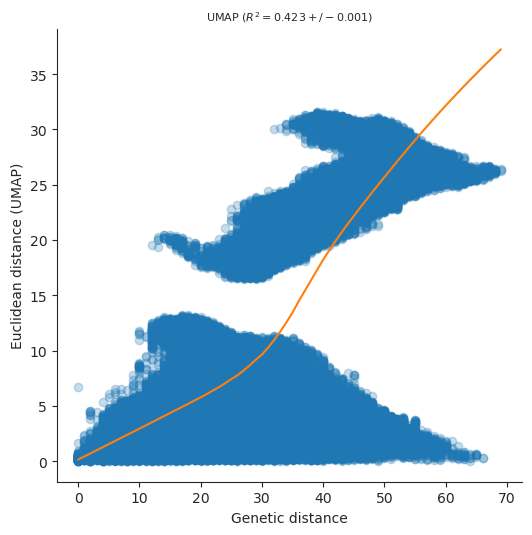

In [51]:
#total_df_UMAP = pd.read_csv(scatterplot_umap,index_col=0)
#metadata_UMAP = pd.read_csv(scatterplot_umap_metadata, index_col=0)

total_df_UMAP = pd.read_csv("results/scatterplot_umap.csv",index_col=0)
metadata_UMAP = pd.read_csv("results/scatterplot_umap_metadata.csv", index_col=0)

mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (UMAP)")
ax.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

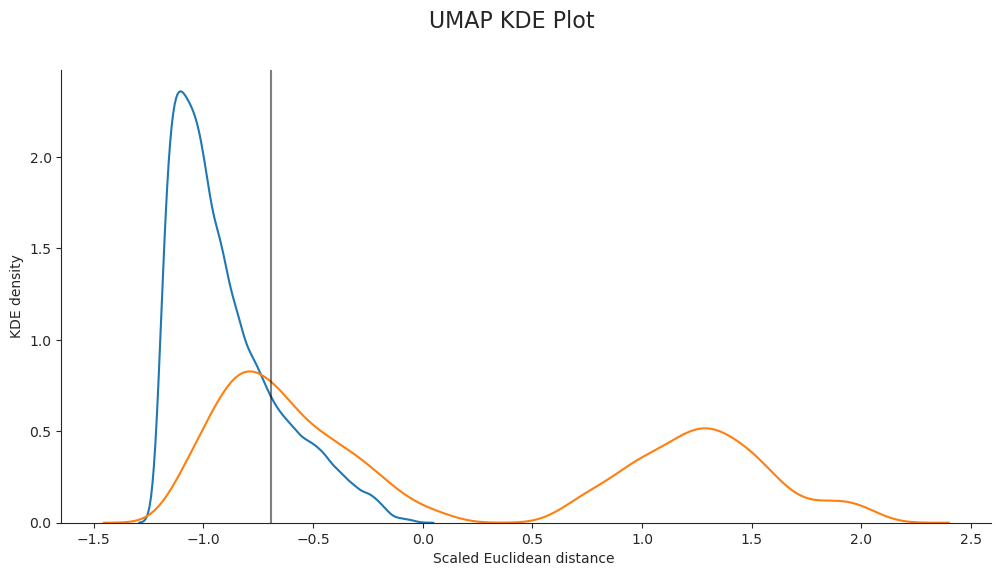

In [52]:
KDE_umap = "results/KDEDensity_umap.csv"
KDE_umap_metadata = "results/KDEDensity_umap_metadata.csv"


UMAP_KDE_df = pd.read_csv(KDE_umap)
UMAP_KDE_metadata_df = pd.read_csv(KDE_umap_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('UMAP KDE Plot', fontsize=16)
sns.despine()

# Linking all plots together clickable with Tree

In [77]:
data = linking_tree_with_plots_brush(
    node_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
    'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [79]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableSars.html")
#save(fullChart, "../docs/FullLinkedChartBrushableSars.png")
fullChart.save(snakemake.output.fullChart)
save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [49]:
import matplotlib.gridspec as gridspec

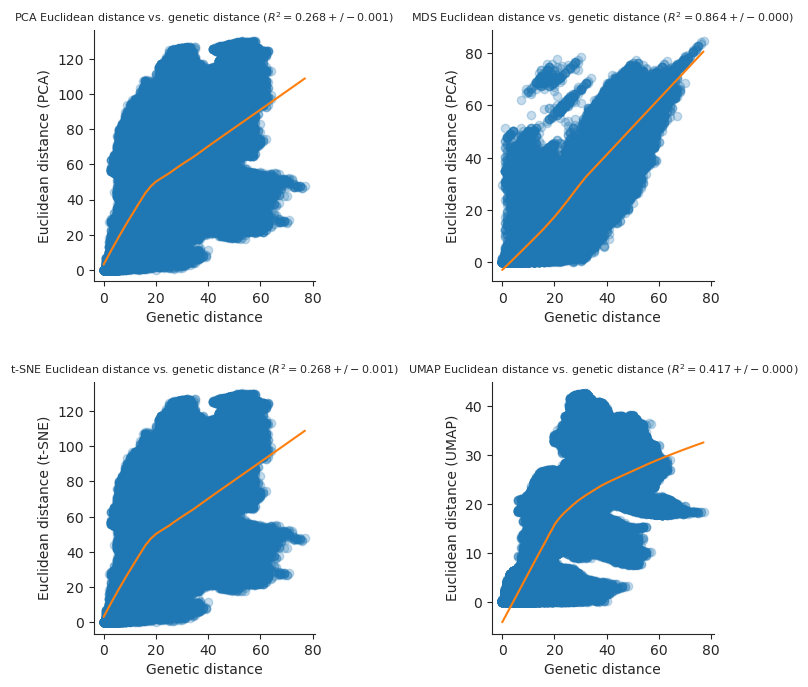

In [51]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [67]:
KDE_genetic = "results/KDEDensity_genetic.csv"
KDE_genetic_metadata = "results/KDEDensity_genetic_metadata.csv"

Genetic_KDE_df = pd.read_csv(KDE_genetic)
Genetic_KDE_metadata_df = pd.read_csv(KDE_genetic_metadata)

In [68]:
import matplotlib.gridspec as gridspec

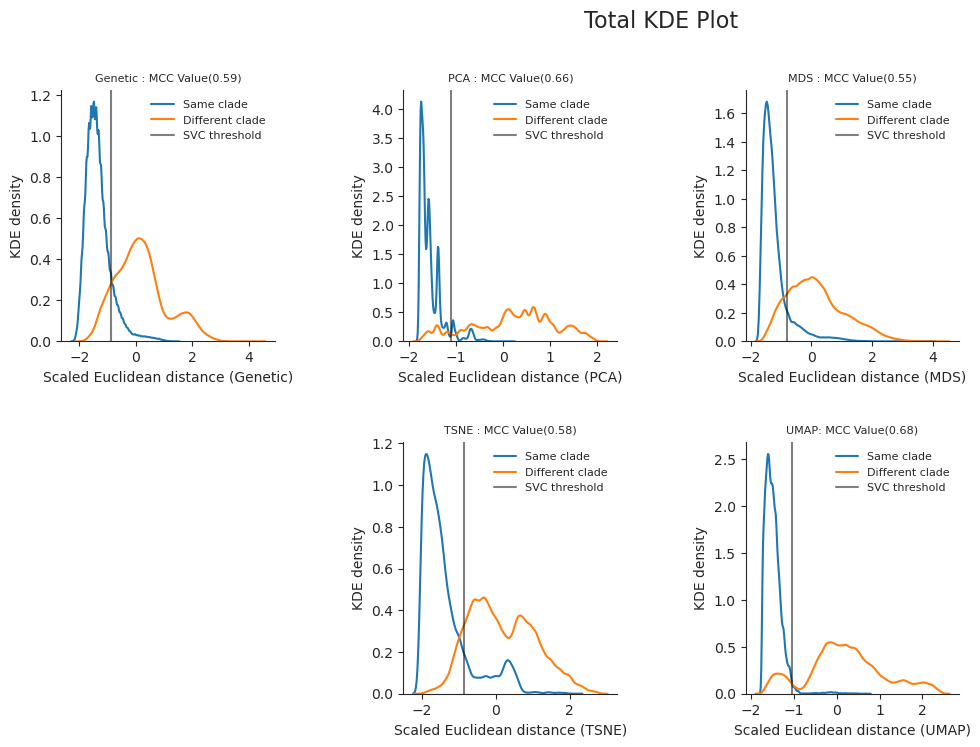

In [70]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic : MCC Value(' + str(round(Genetic_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA : MCC Value(' + str(round(PCA_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS : MCC Value(' + str(round(MDS_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE : MCC Value(' + str(round(TSNE_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP: MCC Value(' + str(round(UMAP_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")

sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

# Supplemental Figures

In [46]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)

# HDBSCAN Final Charts

In [4]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
#node_df = pd.read_csv(node_df, sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [7]:
colors = pd.read_csv("../notebooks/config/color_schemes.tsv", sep="\t", names=[i for i in range(0,101)])
#colors = pd.read_csv(colors, sep="\t", names=[i for i in range(0,101)])

In [32]:
PCA_df = pd.read_csv("results/embed_pca.csv",index_col=0)
MDS_df = pd.read_csv("results/embed_mds.csv",index_col=0)
TSNE_df = pd.read_csv("results/embed_t-sne.csv",index_col=0)
UMAP_df = pd.read_csv("results/embed_umap.csv",index_col=0)
explained_variance_df = pd.read_csv("results/explained_variance_pca.csv")


#PCA_df = pd.read_csv(pca_df,index_col=0)
#MDS_df = pd.read_csv(mds_df,index_col=0)
#TSNE_df = pd.read_csv(tsne_df,index_col=0)
#UMAP_df = pd.read_csv(umap_df,index_col=0)
#explained_variance_df = pd.read_csv(explained_variance_pca)

In [114]:
merged_df = node_df[["strain", "date", "clade_membership", "y"]].merge(
    PCA_df,
    on="strain"
).merge(
    MDS_df,
    on="strain"
).merge(
    TSNE_df,
    on="strain"
).merge(
    UMAP_df,
    on="strain"
)

In [125]:
from Helpers import get_euclidean_data_frame
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [126]:
def _get_embedding_columns_by_method(method):
    if method in ("pca"):
        return list(f"{method}1 {method}2 {method}3 {method}4 {method}5 {method}6 {method}7 {method}8 {method}9 {method}10".split())
    if method in ("mds"):
        return list(f"{method}1 {method}2".split())
    if method in ("t-sne"):
        return list("tsne_x tsne_y".split())
    else:
        return list(f"{method}_x {method}_y".split())

In [129]:
MCC_val = []

for method in ["pca", "mds", "t-sne", "umap"]:
    KDE_df_normal = get_euclidean_data_frame(sampled_df=merged_df, column_for_analysis="clade_membership", embedding="method", column_list=_get_embedding_columns_by_method(method))

    KDE_df_cluster =  get_euclidean_data_frame(sampled_df=merged_df, column_for_analysis=f"{method}_label", embedding="method", column_list=_get_embedding_columns_by_method(method))

    confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    MCC_val.append(matthews_cc_val)

In [132]:
domain =  sorted(merged_df["pca_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
PCA = linking_tree_with_plots_brush(
    merged_df,
    ['pca1', 'pca2'],
    ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_df["explained variance"][0]*100,2)) + ")",
    'PCA2 (Explained Variance : {}%'.format(round(explained_variance_df["explained variance"][1]*100,2)) + ")"],
    'pca_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df["mds_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
MDS = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2'],
    ['MDS1', 'MDS2'],
    'mds_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df["t-sne_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
TSNE = linking_tree_with_plots_brush(
    merged_df,
    ['tsne_x', 'tsne_y'],
    ['TSNE1', 'TSNE2'],
    't-sne_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)
domain =  sorted(merged_df["umap_label"].drop_duplicates().values)
if -1 in domain:
    range_ = ["#999999"] + colors[len(domain)-1:len(domain)].dropna(axis=1).values.tolist()[0]
else: 
    range_ = colors[len(domain):len(domain)+1].dropna(axis=1).values.tolist()[0]
UMAP = linking_tree_with_plots_brush(
    merged_df,
    ['umap_x', 'umap_y'],
    ['UMAP1', 'UMAP2'],
    'umap_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)

In [149]:
PCAChart = PCA[0]|PCA[1].properties(title= "MCC Value: " + str(round(MCC_val[0],3)))
MDSChart = MDS[0]|MDS[1].properties(title= "MCC Value: " + str(round(MCC_val[1],3)))
TSNEChart = TSNE[0]|TSNE[1].properties(title= "MCC Value: " + str(round(MCC_val[2],3)))
UMAPChart = UMAP[0]|UMAP[1].properties(title= "MCC Value: " + str(round(MCC_val[3],3)))

In [150]:
PCAMDS = alt.vconcat(PCAChart, MDSChart).resolve_scale(color='independent')
TSNEUMAP = alt.vconcat(TSNEChart, UMAPChart).resolve_scale(color='independent')
fullChart = alt.vconcat(PCAMDS, TSNEUMAP).resolve_scale(color='independent')
fullChart
fullChart.save(snakemake.output.fullChartHDBSCAN)
save(fullChart, snakemake.output.fullChartHDBSCANPNG, scale_factor=2.0)

alt.VConcatChart(...)